# Logistic Regression

The logistic regression hypothesis is defined as:

$$h_\theta(x) = g(\theta^Tx)$$ where $g$ is the sigmoid function: $$g(z) = \frac{1}{1+e^{-z}}$$

The cost function for the logistic regression model which we now need to minimize:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^m(-y_i log(h_i(\theta)) - (1-y_i)log(1-h_i(\theta)))$$

The model's parameters are the $\theta_j$ values. These are the values that need to be adjusted to minimize cost $J(\theta)$ . One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update:

$$\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$ (simultaneously update $\theta_j$ for all $j$);
With each step of gradient descent, the parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

Note that while this gradient looks identical to linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

### Problem definition

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [50]:
students_exams = pd.read_csv('ex2data1.txt', 
                            header=None,
                            names=['FirstExamScore', 'SecondExamScore', 'Results'])
students_exams['Admission'] = np.where(students_exams['Results']==0, 'Not Admitted', 'Admitted')

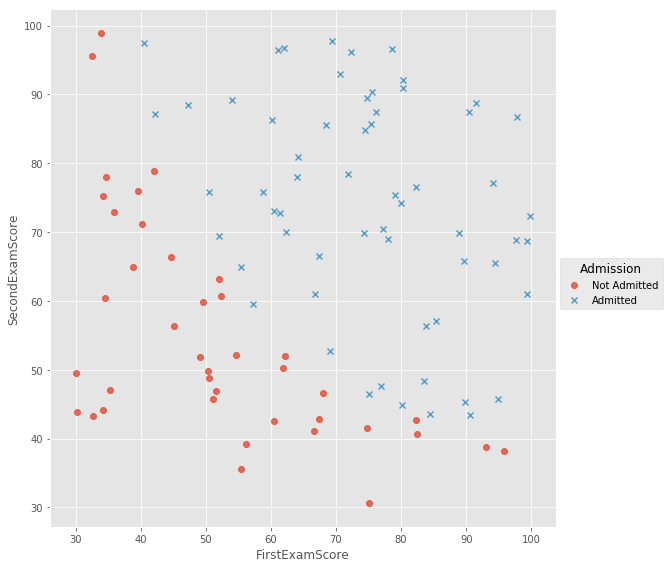

In [51]:
g = sns.lmplot("FirstExamScore", "SecondExamScore", hue="Admission", 
               data=students_exams, markers=["o", "x"], fit_reg=False, size=8)

In [52]:
X = students_exams.iloc[:, 0:2]
X = np.c_[np.ones(X.shape[0]), X]
y = students_exams.iloc[:, 2:3]

In [53]:
X.shape, y.shape

((100, 3), (100, 1))

In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def costFunction(theta, X, y):
    m = y.shape[0]
    h = sigmoid(np.matmul(theta.T, X.T))
    cost = (1/m)*(np.matmul(-y.T,np.log(h).T) - np.matmul((1-y).T,np.log(1-h).T))
    if np.isnan(cost):
        return np.inf
    return cost

def computeGradient(theta, X, y):
    theta = theta.reshape(-1, 1)
    m = y.shape[0]
    h = sigmoid(np.matmul(theta.T, X.T))
    gradient = (1/m)*(np.matmul((h.T-y).T, X))
    return gradient.flatten()

def gradientDescent(X, y, theta, alpha, iterations):
    m = y.shape[0]
    J_history = np.zeros((iterations, 1))
    for i in range(iterations):
        hypothesis_minus_y = (sigmoid(np.matmul(theta.T, X.T).T)-y).T 
        theta = (theta.T - (alpha/m)*(np.matmul(hypothesis_minus_y, X))).T 
        J_history[i] = costFunction(theta, X, y)
    return theta, J_history

def plotDecisionBoundary(X, theta):
    plotx = np.array([min(X[:,1])-2, max(X[:,1])+2])
    ploty = -(theta[1] * plotx + theta[0])/theta[2]
    return plotx, ploty

def predict(X, theta):
    prob = sigmoid(X.dot(theta))
    p = np.where(prob < 0.5, 0, 1)
    return p.reshape(-1, 1)

### Running the model with Gradient Decent

In [70]:
#theta = np.zeros((3, 1))
theta = np.array([-25, 0.2, 0.2]).reshape(-1, 1)                                               
iterations =400
alpha = 0.001
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: intercept={0}, slope={1}, slope={2} ".format(theta[0],theta[1], theta[2]))

Theta found by gradient descent: intercept=[-24.99997875], slope=[0.20494106], slope=[0.20016601] 


In [69]:
from scipy.optimize import check_grad
check_grad(costFunction, computeGradient, theta.squeeze(), X, y)

1.066448322433551e-05

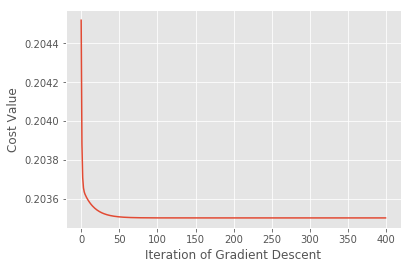

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(iterations), J_history)
plt.ylabel('Cost Value')
plt.xlabel('Iteration of Gradient Descent')
plt.show()

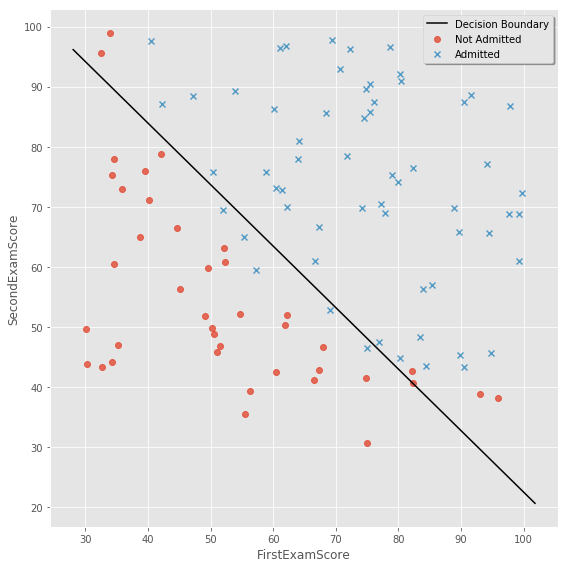

In [30]:
plotx, ploty= plotDecisionBoundary(X, theta)
g = sns.lmplot("FirstExamScore", "SecondExamScore", hue="Admission", 
               data=students_exams, markers=["o", "x"], fit_reg=False, size=8, legend=False)
ax = g.ax
ax.plot(plotx, ploty, color='k', label='Decision Boundary')
legend = ax.legend(loc=1, shadow=True)
plt.show()

In [31]:
prob = predict(X, theta)
p = np.where(prob == y, 1, 0)
print("Model accuracy: ", p.sum()/y.shape[0] * 100, "%")

Model accuracy:  89.0 %


### Running the model with  BFGS algorithm

In [32]:
from scipy import optimize
initial_theta = np.array([0.0, 0.0, 0.0]).T
theta = optimize.fmin_bfgs(f=costFunction, x0=initial_theta, args=(X, y), fprime=computeGradient)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 25
         Function evaluations: 34
         Gradient evaluations: 30


/home/pptr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/pptr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


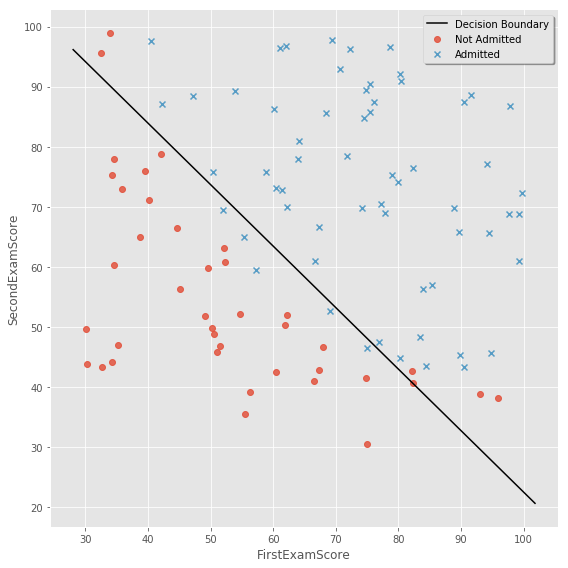

In [34]:
plotx, ploty= plotDecisionBoundary(X, theta)
g = sns.lmplot("FirstExamScore", "SecondExamScore", hue="Admission", 
               data=students_exams, markers=["o", "x"], fit_reg=False, size=8, legend=False)
ax = g.ax
ax.plot(plotx, ploty, color='k', label='Decision Boundary')
legend = ax.legend(loc=1, shadow=True)
plt.show()

###  Calculate Model Accuracy

In [35]:
prob = predict(X, theta)
p = np.where(prob == y, 1, 0)
print("Model accuracy: ", p.sum()/y.shape[0] * 100, "%")

Model accuracy:  89.0 %


For a student with an Exam 1 score of 45 and Exam 2 score of 85, his admission probability is 0.776

In [36]:
X = np.array([1, 45, 85])
sigmoid(X.dot(theta))

0.7762903249331021

## Regularized logistic regression

### Problem definition

We will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [2]:
micro = pd.read_csv('ex2data2.txt', 
                            header=None,
                            names=['MicrochipTest1', 'MicrochipTest2', 'Results'])
micro['QA'] = np.where(micro['Results']==0, 'Rejected', 'Accepted')

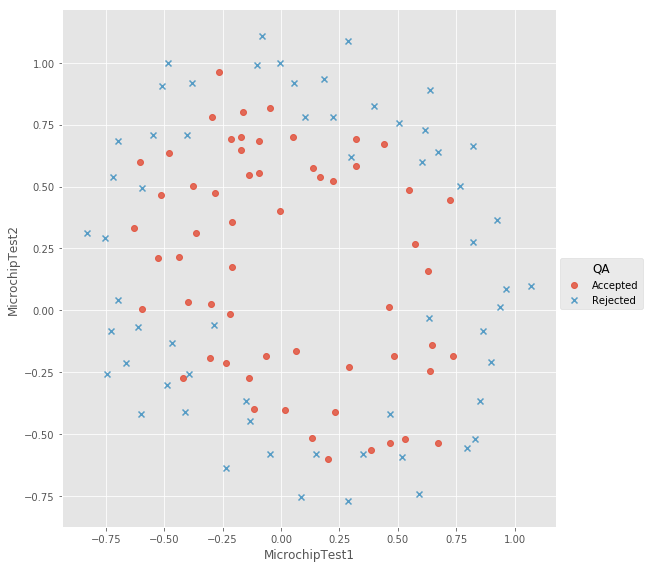

In [3]:
g = sns.lmplot("MicrochipTest1", "MicrochipTest2", hue="QA", 
               data=micro, markers=["o", "x"], fit_reg=False, size=8)

This dataset cannot be separated into a positive and negative examples by a straight-line through the plot. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### Feature mapping

One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of $x1$ and $x2$ up to the **sixth** power.
Doing so we take care of the low bias of the model, but we will also introduce inevitably much more variance. We will combat this second term using regularization.

Applying a regularization terms the cost function looks like this:
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m(-y_i log(h_i(\theta)) - (1-y_i)log(1-h_i(\theta))) + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$$

We need to keep in mind that the we don't have to regularize $\theta_0$, which refers to the first feature we artificially set to 1. Hence the gradient of the cost will look like the following:

$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $ for $j=0$ 

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m}\sum_{j=1}^n\theta_j$ for $j\geq1$

In [4]:
def mapFeature(X1, X2, degree):
    '''
    mapFeature(X1, X2, degree): maps the two input features to quadratic features.
    
    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Inputs X1, X2 must be the same size
    '''
    X = np.ones(X1.shape[0])
    for i in np.arange(degree+1):
        for j in np.arange(i+1):
            X = np.c_[X, np.power(X1, i-j) * np.power(X2, j)]
    return X


As a result of this mapping, our vector of two featues (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear non-linear when drawn in out 2-dimensional plot.

### Functions

In [19]:
def costFunctionReg(theta, X, y, lamb):
    h_theta = sigmoid(X.dot(theta))

    cost = (np.dot(np.log(h_theta).T, -y) + np.dot(np.log(1-h_theta).T, -(1-y))) + lamb/2 * (theta[1:,]**2).sum()
    
    return np.asscalar(cost.squeeze())

def computeGradientReg(theta, X, y, lamb):
    theta = theta.reshape(-1, 1)
    h_theta = sigmoid(X.dot(theta))
    
    gradient = np.dot(X.T, h_theta - y)
    gradient[1:] += lamb * theta[1:,]
    
    return gradient.flatten()

def plotDecisionBoundaryReg(X, theta, ax):
    # generating an evenly spaced grid to evaluate the classifier's predictions
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    
    z = np.zeros((len(u), len(v)));
    # Evaluate z = theta*x over the grid
    for i in np.arange(len(u)):
        for j in np.arange(len(v)):
            z[i,j]= np.dot(mapFeature(np.atleast_1d(u[i]).reshape(-1,1), np.atleast_1d(v[j]).reshape(-1,1), 6), theta)
    
    cs = ax.contour(u, v, z.T, levels=[0], colors='k')
    plt.clabel(cs,  
               inline=1,
               fmt='%1.2f',
               fontsize=14)
    plt.show()
    return z

### Running the model

In [20]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:,0:2]
y = data[:,2]
y = y.reshape(y.shape[0], 1)

# mapping features into all polynomial terms of X1 and X2 up to the sixth power
X_expanded = mapFeature(X[:,0], X[:,1], 15)

initial_theta = np.zeros((X_expanded.shape[1], 1))
#initial_theta = np.random.rand(X_expanded.shape[1], 1)

/home/pptr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/pptr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


         Current function value: nan
         Iterations: 162
         Function evaluations: 172
         Gradient evaluations: 172


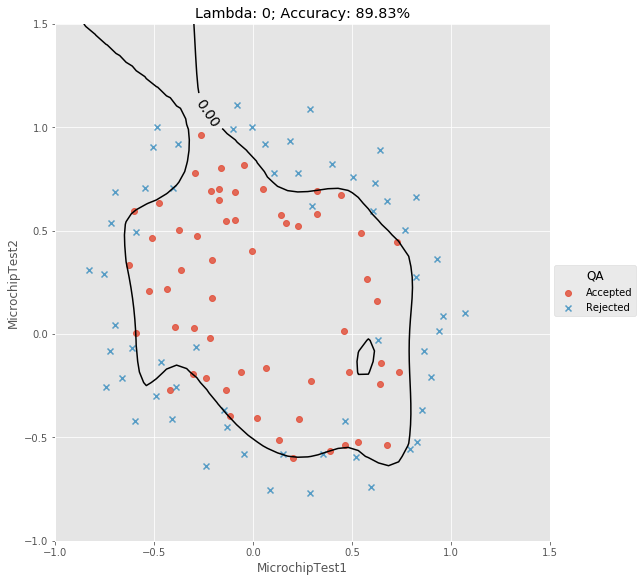

Optimization terminated successfully.
         Current function value: 61.173395
         Iterations: 16
         Function evaluations: 20
         Gradient evaluations: 20


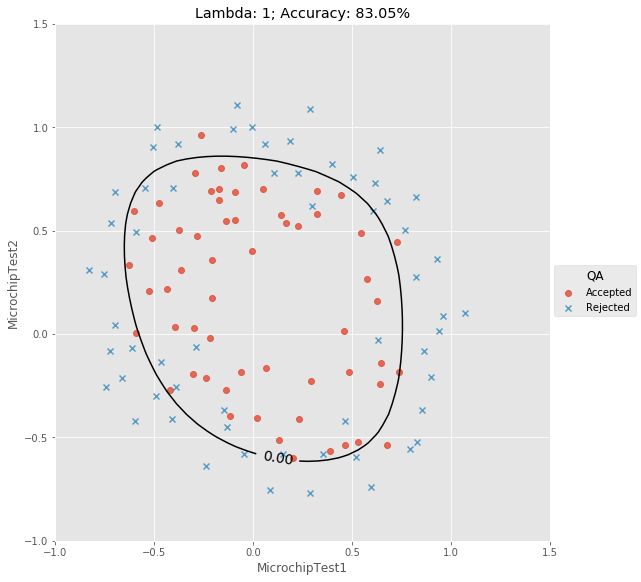

Optimization terminated successfully.
         Current function value: 74.609349
         Iterations: 25
         Function evaluations: 35
         Gradient evaluations: 35


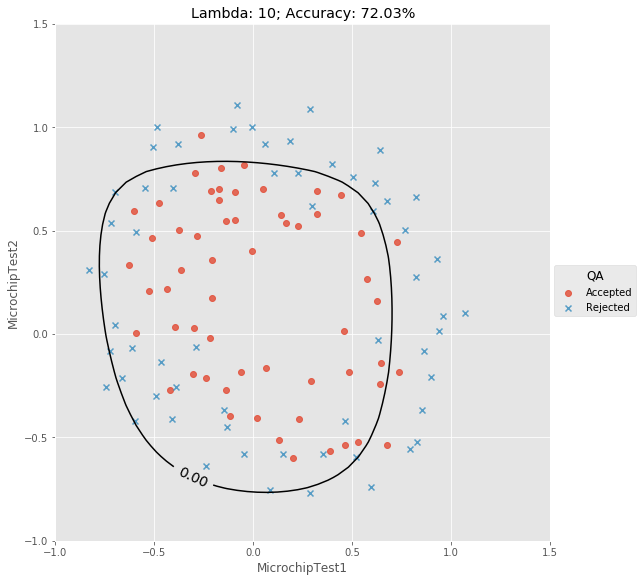

Optimization terminated successfully.
         Current function value: 80.146431
         Iterations: 33
         Function evaluations: 56
         Gradient evaluations: 56


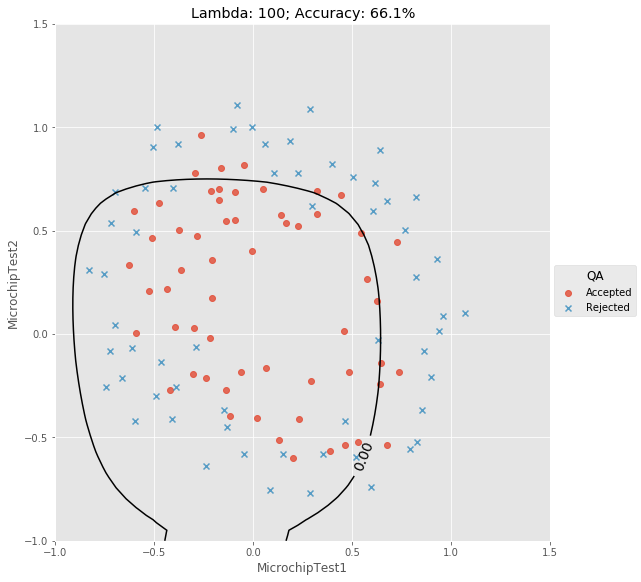

In [18]:
from scipy import optimize
lamda_values = [0, 1, 10, 100]
for lamda in lamda_values:
    theta = optimize.fmin_bfgs(f=costFunctionReg, x0=initial_theta, args=(X_expanded, y, lamda), fprime=computeGradientReg)
    # plot
    g = sns.lmplot("MicrochipTest1", "MicrochipTest2", hue="QA", 
               data=micro, markers=["o", "x"], fit_reg=False, size=8)
    ax = g.ax
    accuracy= np.where(y == predict(X_expanded, theta), 1, 0).sum()/y.shape[0] * 100
    ax.set_title('Lambda: {0}; Accuracy: {1}%'.format(lamda, round(accuracy, 2)))
    z = plotDecisionBoundaryReg(X, theta, ax)


### Appendix: How to estimate the gradient of the cost, given the cost function

Let's say we have both the cost and the gradient functions but we need to somehow debug the latter, as we are already sure the first is correct. This can be quite challenging if we don't have a benchmark. Turns out that there is a math trick which does the job pretty well.

It suffices to re-surface from our calculus courses the definition of derivative w.r.t. a variable and we can write down the following:

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{J(\theta_j + \epsilon) - J(\theta_j)}{\epsilon}$ with $\epsilon$ arbitrarily small

This is actually already implemented in scipy, with the check_grad function.

In [78]:
from scipy.optimize import check_grad

check_grad(costFunctionReg, computeGradientReg, initial_theta.squeeze(), X_expanded, y, lamda)

7.949426878138215e-06

We can see that the error is pretty small!

# Multiclass Classification: One-vs-all

Now we will approach the classification of data when we have more than two categories. Instead of $y = \{0,1\}$ we will expand our definition so that $y = \{0,1...n\}$.

Since $y = \{0,1...n\}$, we divide our problem into $n+1$ (+1 because the index starts at 0) binary classification problems; in each one, we predict the probability that $y$ is a member of one of our classes.

$y\in \{0, 1...n\}$ <br>
$h_\theta^{(0)}(x)$ = $P(y = 0 | x; \theta)$ <br>
$h_\theta^{(1)}(x)$ = $P(y = 1 | x; \theta)$ <br>
$\dots$ <br>
$h_\theta^{(n)}(x)$ = $P(y = n | x; \theta)$ <br>
prediction = $\max_i(h_\theta^{(i)}(x))$

We are basically choosing one class and then lumping all the others into a single second class. We do this repeatedly, applying binary logistic regression to each case, and then use the hypothesis that returned the highest value as our prediction.

<img src="img/onevsall.png">

#### To summarize:

Train a logistic regression classifier $h_\theta(x)$ for each class￼ to predict the probability that ￼$￼y = i$￼ ￼.

To make a prediction on a new $x$, pick the class ￼that maximizes $h_\theta(x)$.

In [123]:
import scipy.io
from scipy import optimize
import random
from sklearn.model_selection import train_test_split

mat = scipy.io.loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Functions

In [20]:
def displayData(X):
    fig = plt.figure(figsize=(8,8))
    plt.title('100 Random Images from the data set')
    indexes = random.sample(range(1, X.shape[0]), 100)
    images = X[indexes,:]
    for i in np.arange(10):
        for j in np.arange(10):
            ax = fig.add_subplot(10, 10, (10*j+i)+1)
            ax.matshow(images[10*j+i,:].reshape(20,20), cmap = 'gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()
    
def oneVsAll(X, y, num_labels, lamda):
    m = X.shape[1]
    all_theta = np.zeros((m + 1, num_labels)) #(401, 10)
    y_copy = y
    X = np.c_[np.ones((X.shape[0], 1)), X]
    for k in np.arange(num_labels):
        initial_theta = np.zeros((1, m + 1)).reshape(-1, 1)
        y_copy = np.where(y != k + 1, 0, k + 1)
        #theta = optimize.fmin_bfgs(f=costFunctionReg, x0=initial_theta.squeeze(), args=(X, y_copy, lamda), fprime=computeGradientReg)
        theta = optimize.minimize(fun=costFunctionReg, x0=initial_theta.squeeze(), args=(X, y_copy, lamda),
                                  method='TNC', jac=computeGradientReg, options=dict(disp=True, maxiter=100000))
        all_theta[:, k] = theta.x
    return all_theta
    

def predictOneVsAll(theta, X):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    return sigmoid(X.dot(theta))

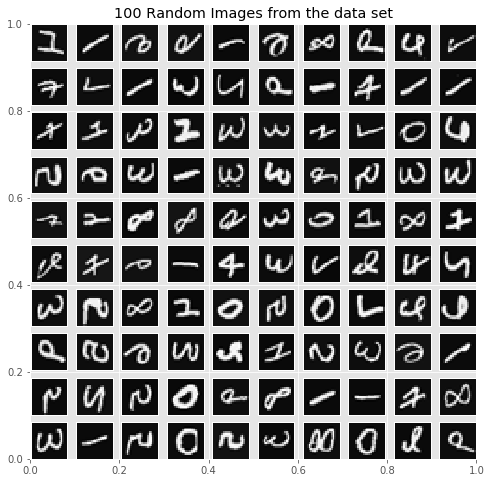

In [124]:
displayData(X_train)

### Train the model choosing the best lambda value

In [135]:
num_labels = 10
accuracy = np.array([])

for lamda in [0, 0.1, 10, 100]:
    all_theta = oneVsAll(X_train, y_train, num_labels, lamda)
    prob = predictOneVsAll(all_theta, X_test)
    pred = np.argmax(prob, axis=1) + 1
    p = np.where(pred.reshape(-1, 1) == y_test, 1, 0)
    accuracy = np.append(accuracy, (p.sum()/y_test.shape[0]) * 100)

print("Accuracy: ", accuracy.max())

/home/pptr/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Accuracy:  81.3


### Compare our Logistic Regression to Sklearn Logistic Regression

In [146]:
import scipy.io
from scipy import optimize
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mat = scipy.io.loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [147]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train.ravel())

In [148]:
print("Accuracy: ", clf.score(X_test, y_test) * 100)

Accuracy:  91.9


The value to predict is:

In [149]:
y_test[0][0]

3

The predicted value is:

In [150]:
clf.predict(X_test[0, :].reshape(-1, 1).T)[0]

3

### Compare Logistic Regression to SVM

In [151]:
from sklearn import svm

mat = scipy.io.loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [156]:
clf = svm.SVC(kernel='rbf', C=1.0)
clf.fit(X_train, y_train.ravel())
#accuracy = (clf.predict(X_test).reshape(-1,1) == y_test.reshape(-1,1)).sum()/y_test.shape[0]
print("Accuracy: ", clf.score(X_test, y_test) * 100)

Accuracy:  90.7
